# <CENTER> REDES NEURAIS ARTIFICIAIS 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
def pesos_classe(contagem_por_classe, contagem_total):
    
    c = 0
    pesos_classes = {}
    
    for classe in contagem_por_classe:
        peso = contagem_total/(len(contagem_por_classe)*classe)
        pesos_classes[c] = peso
        c += 1
    
    return pesos_classes 
        

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [9]:
df_full = pd.read_csv('granitos_db_att.txt', sep='\t', index_col=0)

In [10]:
df_temp = df_full.dropna(subset=['MnO', 'TiO2','FeOt', 'MgO', 'Na2O', 'CaO', 'Al2O3'])

In [11]:
preditores = ['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'K2O', 'Na2O']
alvos = ['Group']

In [12]:
df_preditores = df_temp[preditores]
df_alvo = df_temp[alvos]

In [13]:
df_preditores.isna().sum()

SiO2     0
TiO2     0
Al2O3    0
FeOt     0
MnO      0
MgO      0
CaO      0
K2O      0
Na2O     0
dtype: int64

In [14]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

In [15]:
for train_index, test_index in split.split(df_preditores, df_alvo):
         X_train, X_test = df_preditores.iloc[train_index], df_preditores.iloc[test_index]
         y_train, y_test = df_alvo.iloc[train_index], df_alvo.iloc[test_index]

In [16]:
escaler = StandardScaler()
encoder = LabelEncoder()

X_train = escaler.fit_transform(X_train)
y_train = encoder.fit_transform(np.ravel(y_train))

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)


In [ ]:
#para ver ao título das classes
#encoder.classes_

In [ ]:
#oversample = SMOTE()
#X_treino_smote, y_train_smote= oversample.fit_resample(X_train, y_train)

# <CENTER >CRIANDO E IMPLEMENTANDO A REDE NEURAL

In [17]:
rede_neural = keras.models.Sequential()
rede_neural.add(keras.layers.Flatten())
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dropout(rate=0.15))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(6, activation="softmax"))

In [18]:
otimizador = keras.optimizers.SGD(learning_rate = 0.01, decay=1e-4)

rede_neural.compile(loss="sparse_categorical_crossentropy",
                    optimizer=otimizador,
                    metrics=["accuracy"])

In [19]:
contagem_por_classe = y_train.value_counts().sort_index().to_list()
contagem_total = y_train.value_counts().sum()
contagem_por_classe, contagem_total

([507, 218, 190, 729, 552, 352], 2548)

In [20]:
pesos = pesos_classe(contagem_por_classe, contagem_total)
pesos

{0: 0.8376068376068376,
 1: 1.9480122324159022,
 2: 2.2350877192982455,
 3: 0.582533150434385,
 4: 0.7693236714975845,
 5: 1.206439393939394}

In [21]:
history = rede_neural.fit(X_train, y_train, epochs=100)

Epoch 1/100
80/80 [==============================] - 1s 2ms/step - loss: 0.9814 - accuracy: 0.6589
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7814
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.8053
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.8254
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8395
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8552
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8599
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8673
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3530 - accuracy: 0.8740
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8752
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9812
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9761
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9784
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9812
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9792
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9835
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9776
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9812
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9831
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9800
Epoch 93/100


In [22]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

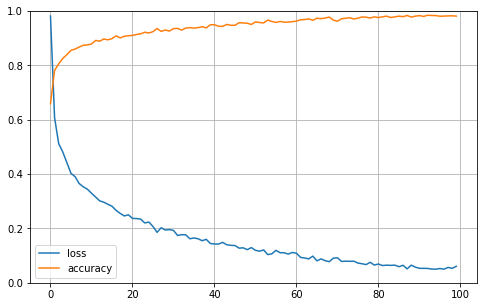

In [23]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [24]:
X_test = escaler.fit_transform(X_test)
y_teste1 = encoder.fit_transform(np.ravel(y_test))
encoder2 = OneHotEncoder()
y_teste2 = encoder2.fit_transform((y_test))


In [25]:
rede_neural.evaluate(X_test, y_teste1)

20/20 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.8777


[0.6466014385223389, 0.8777429461479187]

In [26]:
y_PRED = rede_neural.predict(X_test)

20/20 [==============================] - 0s 2ms/step


In [27]:
from sklearn.metrics import classification_report, precision_score, accuracy_score
print(classification_report(y_teste2.toarray().argmax(axis=1), y_PRED.round().argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       127
           1       0.91      0.94      0.93        54
           2       0.95      0.83      0.89        48
           3       0.91      0.89      0.90       183
           4       0.83      0.83      0.83       138
           5       0.87      0.90      0.88        88

    accuracy                           0.88       638
   macro avg       0.89      0.88      0.88       638
weighted avg       0.88      0.88      0.88       638



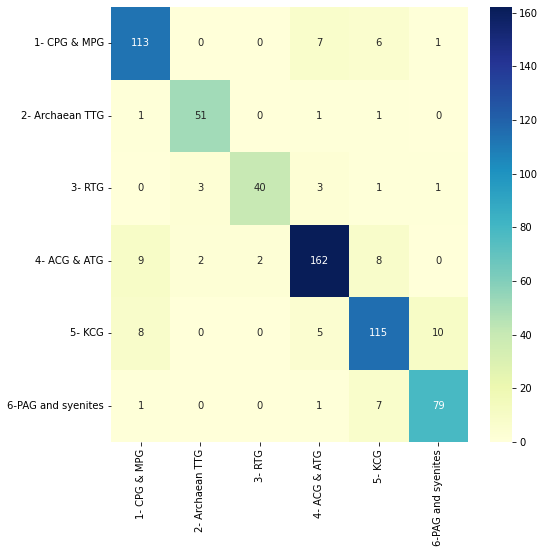

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_teste2.toarray().argmax(axis=1), y_PRED.round().argmax(axis=1), labels=[0,1,2,3,4,5])
plt.figure(figsize=(8, 8))
ax = sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='d')
ax.xaxis.set_ticklabels(encoder.classes_, rotation = 90)
ax.yaxis.set_ticklabels(encoder.classes_, rotation = 0)
plt.show()